This notebook reads the Cylinder dose DICOMs and creates 1d dose profiles for the Topas results, Acuros results and corrected Acuros results.

In [1]:
#Install the Pydiocom Library
!pip install pydicom

     |████████████████████████████████| 1.9MB 2.8MB/s 


In [2]:
#Import the pydicom library to access the data from dicom files
import pydicom 
import matplotlib.pyplot as plt


In [14]:
#Read the Acuros Treatment Planning dicom file
plan = pydicom.dcmread("/content/RD.1.2.246.352.71.7.71129641657.3448600.20210520134248.dcm")
#Read the Topas dicom file
data = pydicom.dcmread("/content/TotDose_Cyl.dcm")
#Read the Acuros DICOM file with the corrected density
corr = pydicom.dcmread("/content/RD.1.2.246.352.71.7.71129641657.3448612.20210521124835.dcm")

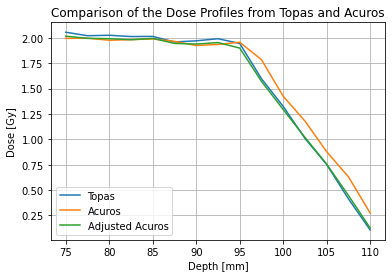

In [17]:
#This script overlays a 1d dose profile from the three loaded DICOMs.

#Inititae lists to store the Acuros data
dose_plan = []
z_axis_plan = []
#Inititae lists to store the corrected Acuros data
dose_corr = []
z_axis_corr = []
#Inititae lists to store the Topas data
dose = []
z_axis = []

#Iterate over the data points for the SOBP and distal dose drop-off
for z in range(30,45):
  dose_plan.append(plan.pixel_array[30][z][30]*float(plan.DoseGridScaling))
  z_axis_plan.append(z*plan.PixelSpacing[1])

  dose.append(data.pixel_array[30][z][30]*float(data.DoseGridScaling)*1000)
  z_axis.append(z*data.PixelSpacing[1])

  dose_corr.append(corr.pixel_array[30][z][30]*float(corr.DoseGridScaling))
  z_axis_corr.append(z*corr.PixelSpacing[1])

#Initiate a figure
f1 = plt.figure()

#Add titles
plt.title("Comparison of the Dose Profiles from Topas and Acuros")
plt.xlabel("Depth [mm]")
plt.ylabel("Dose [Gy]")

#Plot the three dose distributions
plt.plot(z_axis,dose,label = "Topas")
plt.plot(z_axis_plan,dose_plan,label = "Acuros")
plt.plot(z_axis_corr,dose_corr,label = "Adjusted Acuros")
plt.grid()
plt.legend()

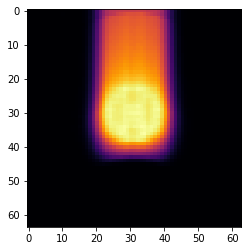

In [12]:
#Display the Topas results
plt.imshow(data.pixel_array[30], cmap=plt.cm.inferno)

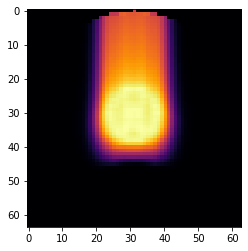

In [9]:
#Display the Acuros Data
plt.imshow(plan.pixel_array[30], cmap=plt.cm.inferno)

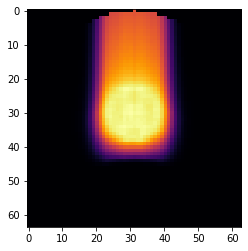

In [18]:
#Display the corrected Acuros results
plt.imshow(corr.pixel_array[30], cmap=plt.cm.inferno)